In [8]:
import tensorflow as tf
import numpy as np
import pickle
np.random.seed(7)

In [9]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\input_layer_4_6_10_2.pickle','rb') as file:
    input_data = pickle.load(file)
permutation = list(np.random.permutation(input_data.shape[0]))
input_data = input_data[permutation,:]
print(input_data.shape)
x_train = input_data[:100000, :]
x_test = input_data[100000:105000, :]


(105000, 24)


In [10]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\output_layer_4_6_10_2.pickle','rb') as file:
    output_data = pickle.load(file)
output_data = np.transpose(output_data)
output_data = output_data[permutation,:]
y_train = output_data[:100000, :]
y_test = output_data[100000:105000, :]
print(output_data.shape)

(105000, 12)


In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(150, input_shape = [24], activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.005)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 100, verbose = 2, validation_data = (x_test, y_test))


Train on 100000 samples, validate on 5000 samples
Epoch 1/100
100000/100000 - 2s - loss: 0.3470 - accuracy: 0.8575 - val_loss: 0.2815 - val_accuracy: 0.8826
Epoch 2/100
100000/100000 - 1s - loss: 0.2630 - accuracy: 0.8885 - val_loss: 0.2520 - val_accuracy: 0.8912
Epoch 3/100
100000/100000 - 1s - loss: 0.2381 - accuracy: 0.8969 - val_loss: 0.2376 - val_accuracy: 0.8975
Epoch 4/100
100000/100000 - 1s - loss: 0.2187 - accuracy: 0.9051 - val_loss: 0.2117 - val_accuracy: 0.9081
Epoch 5/100
100000/100000 - 1s - loss: 0.1994 - accuracy: 0.9126 - val_loss: 0.1948 - val_accuracy: 0.9138
Epoch 6/100
100000/100000 - 1s - loss: 0.1822 - accuracy: 0.9186 - val_loss: 0.1795 - val_accuracy: 0.9192
Epoch 7/100
100000/100000 - 1s - loss: 0.1665 - accuracy: 0.9240 - val_loss: 0.1641 - val_accuracy: 0.9238
Epoch 8/100
100000/100000 - 1s - loss: 0.1542 - accuracy: 0.9285 - val_loss: 0.1584 - val_accuracy: 0.9263
Epoch 9/100
100000/100000 - 1s - loss: 0.1464 - accuracy: 0.9318 - val_loss: 0.1494 - val_accu

Epoch 77/100
100000/100000 - 1s - loss: 0.0310 - accuracy: 0.9880 - val_loss: 0.0556 - val_accuracy: 0.9808
Epoch 78/100
100000/100000 - 1s - loss: 0.0284 - accuracy: 0.9890 - val_loss: 0.0559 - val_accuracy: 0.9804
Epoch 79/100
100000/100000 - 1s - loss: 0.0283 - accuracy: 0.9891 - val_loss: 0.0565 - val_accuracy: 0.9803
Epoch 80/100
100000/100000 - 1s - loss: 0.0280 - accuracy: 0.9892 - val_loss: 0.0592 - val_accuracy: 0.9804
Epoch 81/100
100000/100000 - 1s - loss: 0.0302 - accuracy: 0.9884 - val_loss: 0.0584 - val_accuracy: 0.9803
Epoch 82/100
100000/100000 - 1s - loss: 0.0293 - accuracy: 0.9888 - val_loss: 0.0536 - val_accuracy: 0.9821
Epoch 83/100
100000/100000 - 1s - loss: 0.0276 - accuracy: 0.9893 - val_loss: 0.0613 - val_accuracy: 0.9800
Epoch 84/100
100000/100000 - 1s - loss: 0.0281 - accuracy: 0.9893 - val_loss: 0.0577 - val_accuracy: 0.9811
Epoch 85/100
100000/100000 - 1s - loss: 0.0287 - accuracy: 0.9891 - val_loss: 0.0545 - val_accuracy: 0.9817
Epoch 86/100
100000/100000 -

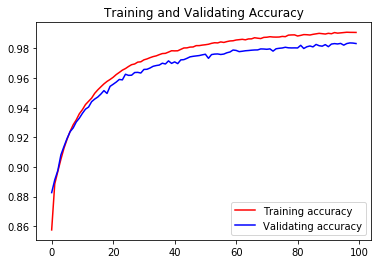

In [12]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
#plt.title('Training Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [13]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Look_ahead_N\\Look_ahead_N_4_6_10_2_model.h5')